# <p style="text-align:center"> <span style="color:blue">[WMCS011-05] Pattern Recognition (for CS) 2022-2023 </span></p>

## <p style="text-align:center"> 1st practical: Iris recognition \& Image matching using SIFT</p>

### $$ \text{Group 21} $$
### $$ \text{Chris Hadjicristodoulou}  \quad \& \quad \text{Herman Lassche}  $$

## **Information and instructions**
*   <span style="color:red">**DEADLINE**</span>  Tuesday 6 December 2022 **before** 23:59PM. Hand in this file *containing your code and answers added* through Brightspace.
*   This is a group assignment (should be done in pairs). 
*  Insert a Markdown cell (where needed) and add the formulas you used to answer a question, as well as a short description of how you came up with your solution.
*   Some exercises ask you to find a specific value or expression or ask you for an interpretation. Insert a Markdown cell and provide your answers briefly.
* Make sure to include all the necessary print statements and remove the extra ones that were only used for testing your implementation. 
*   Please ensure that all your figures are properly labeled with title, axis labels, and legend if you plot multiple curves in one graph.
*   Structure your code using comments and separate code cells where necessary, and be sure to indicate which part of your code belongs to which question.
*   To test your code, we will run all your code cells from scratch - so make sure all results can be reproduced!
* For any questions, you can contact us at [pr2022rug@gmail.com](pr2022rug@gmail.com).

## Table of Contents
* [Exercise 1 - Person authentication by binary iris pattern (50pt)](#chapter1)
    * [Part 1 - Distribution of authentics and imposters](#section_1_1)
    * [Part 2 - Person authentication](#section_1_2)
* [Exercise 2 - Image matching using SIFT (50 pt)](#chapter2)
* [Contributions](#chapter3)

In [1]:
# Import libraries
import scipy.io
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# <span style="color:blue">Exercise 1 - Person authentication by binary iris pattern (50pt)  <a class="anchor" id="chapter1"></a></span>


On Brightspace, you will find the file **lab1-data_Irisrecognition.zip**, which contains the iris codes of different persons. The file named $\textit{person01.mat}$ to $ \textit{person20.mat}$ contains a two-dimensional binary array of 20 rows, in which each row is a 30-dimensional binary iris code extracted from an iris image of a person. If you take a closer look at the rows of one such array, you will notice that two rows can differ in only a few positions (bits); If you compare two rows that come from two different files $person[i]$ and $ person[j]$, you will notice that two such iris codes differ in about 15 positions.

## Part 1 - Distribution of authentics and imposters (20pt) <a class="anchor" id="section_1_1"></a></span>


Compute two sets S and D of 10000 normalized Hamming Distance (HD) as follows:

<ol>
<li> <b> For set S: </b> Choose randomly one person and randomly two iris codes (rows) from that person. Compute the normalized HD of the iris codes from these two rows. Repeat this process 10000 times to obtain 10000 such normalized HD values. </li>
<br>

<li> <b>For set D: </b> Choose randomly two different persons and randomly one row from each of these two persons. Compute the normalized HD of these two iris codes from these two different persons. Repeat this process 10000 times to obtain 10000 such normalized HD values. </li>

</ol>

<span style="color:blue"> **(10 pt) (A)** </span> **Plot the histograms of Set S and D in one figure with different colors. Make sure to use bins of the same size for the two histograms and to use an appropriate number of bins.**

<hr>

1. We used numpy arrays to import the iris code, this gives useful utillities we will use later on. The function twoDigits is used for getting the right files (0 added in front). The function normalizedHD, computes the normalized HD. 
The normalized HD is computed by the following formula:
$h(l_{t},l_{p}) = \frac{|l_{t} \oplus l_{p}|}{|l_{t}|}$

In [2]:
# Compute Set S...
def twoDigits(a):
    return str(a) if a > 9 else str('0' + str(a)) 

def normalizedHD(a,b):
    return (np.sum(np.bitwise_xor(a,b)))/len(a)

setS = []
N = 10000

for _ in range(N):
    mat = np.array(scipy.io.loadmat('data/person' + twoDigits(random.randint(1,20)) + '.mat')['iriscode'])
    setS.append(normalizedHD(mat[random.randint(0,19)], mat[random.randint(0,19)])) #Assumed that the codes may be the same

In [3]:
# Compute set D...
setD = []

for _ in range(N):
    persons = random.sample(range(1,20),2)
    mat_0 = np.array(scipy.io.loadmat('data/person' + twoDigits(persons[0]) + '.mat')['iriscode'])
    mat_1 = np.array(scipy.io.loadmat('data/person' + twoDigits(persons[1]) + '.mat')['iriscode'])
    setD.append(normalizedHD(mat_0[random.randint(0,19)], mat_1[random.randint(0,19)]))

2. For this we used the matlab plot library. This makes it easy to create histograms. We tried several bins. Smaller number of bins creates larger bars and therefore less clearly the division over the whole range and the difference between the two colors is less clear.
When the number of bins is larger, the bars become really small and don't really show more clearly the differences between the colors as when the number is 40. 
The graph is cutted of at 0.8, since it focuses more on the more important part in the middle of the graph.

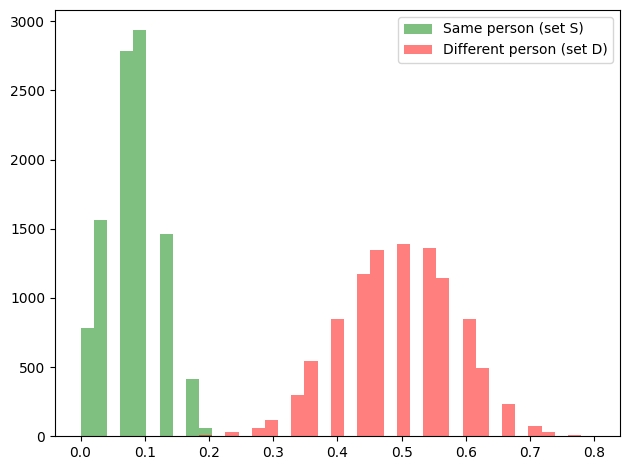

In [4]:
# Plot histograms of Set S and D...
n_bins = 40
bins = np.linspace(0,0.8,n_bins) #Makes a clear image of the most important parts, creates nice clustered bars: not to small, but the difference is still clearly visible
plt.hist(setS, bins, alpha=0.5, color='g', label='Same person (set S)')
plt.hist(setD, bins, alpha=0.5, color='r', label='Different person (set D)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

<span style="color:blue">  **(5 pt) (B)** </span> **Compute the mean and the variance of the set S and D and specify their values.**

<hr>

For this, we simply used the functions provided by numpy and printed them to.

In [5]:
# Compute mean and variance...
setS_mean = np.mean(setS)
setS_var = np.var(setS)

setD_mean = np.mean(setD)
setD_var = np.var(setD)
print('Set S -> Mean: ' + str(setS_mean) + ' | Variance: ' + str(setS_var) + '.')
print('Set D -> Mean: ' + str(setD_mean) + ' | Variance: ' + str(setD_var) + '.')

Set S -> Mean: 0.08075 | Variance: 0.001824659722222222.
Set D -> Mean: 0.49564333333333327 | Variance: 0.007965352788888887.


<span style="color:blue">  **(5 pt) (C)** </span> **Draw the normal distributions (Gaussian functions), that correspond to the means and variances calculated above, to the histograms of Set S and D. Find an appropriate way to scale the normal distribution curves so that they fit well the histograms.**

<hr>

For the scale we used N/n_bins. Where N is the number of samples. 
Those give a good scalar. Since if N is lower, the bars are lower. If the number of bins are smaller, the bars are larger.
The gaussian distribution scales the normalized version of the samples and this scale multiplies this by the amount of samples(/height).

We used the formula that was introduced in the lecture and scaled that:
$N(\mu, \sigma^{2}) = \frac{1}{\sqrt{2\pi}\sigma}(-\frac{1}{2}\frac{(x-\mu)^{2}}{\sigma^{2}})^{e} $

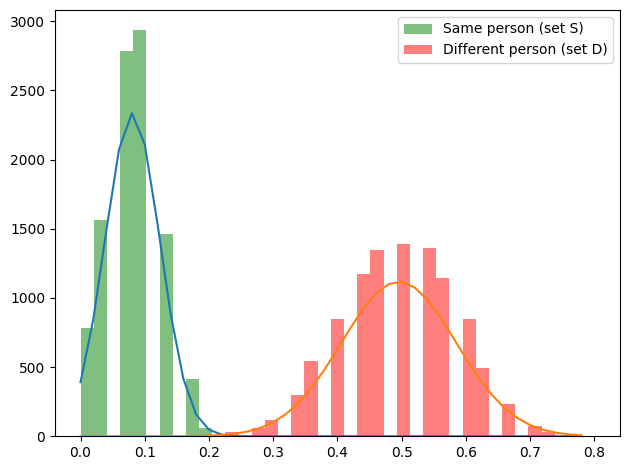

In [6]:
# Plot the distributions...
plt.hist(setS, bins, alpha=0.5, color='g', label='Same person (set S)')
plt.hist(setD, bins, alpha=0.5, color='r', label='Different person (set D)')
plt.legend(loc='upper right')
plt.tight_layout()

scale = N/n_bins
x = np.arange(start=0, stop=0.8, step=0.02)
setS_y = scale*(1/math.sqrt(2*math.pi*setS_var))*np.exp(-(np.power(x-setS_mean,2))/(2*setS_var))
setD_y = scale*(1/math.sqrt(2*math.pi*setD_var))*np.exp(-(np.power(x-setD_mean,2))/(2*setD_var)) 
plt.plot(x, setS_y)
plt.plot(x, setD_y)
plt.show()

## Part 2 - Person authentication (30pt) <a class="anchor" id="section_1_2"></a></span>


The distribution associated with the set S is the class-conditional probability density function that we measure a given HD value for two iris codes of the same person. The distribution associated with the set D is the class-conditional probability density function that we measure a given HD value for two iris codes of two different persons.

Our Null-hypothesis $\textit{H0}$ is that two iris patterns are different. We choose a value
for the decision criterion $\textit{d}$ and compare the HD of two iris patterns to d. If $ \textit{HD > d}$, we consider this as confirmation of our assumption that the two iris codes are different; If $\textit{HD < d}$, we consider our assumption that the two iris codes are different is not confirmed, i.e., implicitly we accept that they come from the same person.

<span style="color:blue">  **(5 pt) (A)** </span> **Estimate the value of the decision criterion d for which the probability of accepting an imposter is 0.0005. This situation will occur when the HD between the iris codes of two different persons is smaller than the decision criterion d. You can use the python function $scipy.stats.norm.ppf$ to find such decision criterion.**

<hr>

We used the suggested function (norm.ppf). This functions calculates at which point there is a 'p' probability density. Whe give p = 0.0005; The outcome is reasonable when looking at the plots. Around 0.2 is a split in the distributions. 

In [7]:
# Estimate the decision criterion d...
d = scipy.stats.norm.ppf(0.0005, setD_mean, math.sqrt(setD_var))
print('Estimation of decision criterion d: ' + str(d))

Estimation of decision criterion d: 0.20196768845557472


<span style="color:blue">  **(5 pt) (B)** </span> **For the value of the decision criterion calculated above, determine the probability of rejecting an authentic person. For this purpose, use a normal distribution to model Set S and find the value of the integral in the tail of this distribution for values HD > d. You can use the python function $scipy.stats.norm.cdf$ to compute such a probability.**

<hr>

We again used the suggested function (norm.cdf). This function caculates the probability density at a point. However, we want the other side of the point, therefore we simply extract it of 1. The probability is insanely low, which represents a good decission point when it comes to false negatives.

In [8]:
# Determine the probability of...
prob = 1 - scipy.stats.norm.cdf(d, setS_mean, math.sqrt(setS_var))
print('Probability of rejecting an authentic person: ' + str(prob))

Probability of rejecting an authentic person: 0.002271594688476153


<span style="color:blue">  **(15 pt) (C)** </span> **Consider the iris code given in the file $\textit{testperson.mat}$. This file contains an iris code with some missing bits. These missing bits have the value 2 instead of 0 or 1. To which of the 20 persons whose iris codes are stored in files $person01.mat$ to $person20.mat$ does this iris code most likely belong to?**

<hr>

We created a function that computes the mask and we created a funtion that computes the normalizedHD with missing points by the following formula: $h(l_{t},l_{p},mask_{t},mask_{p}) = \frac{|(l_{t} \oplus l_{p}) \cap mask_{t} \cap mask_{p} |}{mask_{t} \cap mask_{p}}$

We calculate the hamming distance of all scans of all persons with the test person. For the persons we give a mask of [1....1], since we assume those scans are correct.
We take the average of all scans to compare with the criterium. If it is lower than the criterium it is added to a list of possible correct solutions. The final outcome is printed.

In [9]:
def createMask(b):
     a = np.array(b, copy=True)
     a[a == 1] = 1
     a[a == 0] = 1
     a[a == 2] = 0
     return a

def normalizedHDmissing(a,b,maskA, maskB):
     return (np.sum(np.bitwise_and(np.bitwise_and(np.bitwise_xor(a,b), maskA), maskB)))/np.sum(np.bitwise_and(maskA,maskB))

test = np.array(scipy.io.loadmat('data/testperson.mat')['iriscode'])
masktest = createMask(test)
HD_test = []
HD_test_crit = []
for i in range(20):
    mat = np.array(scipy.io.loadmat('data/person' + twoDigits(i+1) + '.mat')['iriscode'])
    temp = []
    for j in range(20):
          temp.append(normalizedHDmissing(mat[j],test,[1]*30,masktest)) 
    HD_test.append(np.mean(temp))
    if HD_test[i] < d:
          HD_test_crit.append(i) 

best = np.argmin(HD_test)
print('The lowest HD belongs to person ' + str(twoDigits(best+1)) + '. Therefore it is most probably a scan of this person, with criterium: ' 
     + str(HD_test[best]) + '. It also is the only scan that is lower than the decision criterium (Number of HD lower than d: ' + str(len(HD_test_crit)) + ').' )



The lowest HD belongs to person 05. Therefore it is most probably a scan of this person, with criterium: 0.027500000000000004. It also is the only scan that is lower than the decision criterium (Number of HD lower than d: 1).


<span style="color:blue"> **(5 pt) (D)** </span> **What is the significance level of your decision? $Hint:$ Excluding the bits with a value of 2, denote by HDt the normalized Hamming distance between the iris code of the test person and the iris code of the person that you identified in the data set. The significance level which corresponds to HDt is defined as the probability that the comparison of the iris code of the test person with the iris code of a different person will result in a HD such that HD ≤ HDt, i.e., the concerned significance level is equal to the integral of the tail of the distribution for HD ≤ HDt. To compute its value, make use of the theoretical expression for the parameters of the normal distribution of the normalized iris code HD for the given number of available (i.e., non-missing) bits.**


<hr>

First we delete the bits that will not be taken into account. From this we compute the normalized hamming distance for all scans, excluding the one which is probably the test person(e.g. 'best'). The outcome is printed, again very low probability.

In [10]:
delBits = np.where(test == 2)
test = np.delete(test, delBits[1], 1)
idP = np.array(scipy.io.loadmat('data/person' + twoDigits(best+1) + '.mat')['iriscode'])
idP_mean = []

for i in range(20):
    a = idP[i]
    a = np.delete(a, delBits[1], 0)
    idP_mean.append(normalizedHD(a, test))
HDt = np.mean(idP_mean)

setHD = []
for i in range(20):
    if i == best:
        continue
    mat = np.array(scipy.io.loadmat('data/person' + twoDigits(i+1) + '.mat')['iriscode'])
    for j in range(20):
            a = mat[j]
            a = np.delete(a, delBits[1], 0)
            setHD.append(normalizedHD(a, test))

prob = scipy.stats.norm.cdf(HDt, np.mean(setHD), math.sqrt(np.var(setHD)))
print('Probability of accepting another person: ' + str(prob))

Probability of accepting another person: 0.00011184919599257469


<hr>

# <span style="color:blue">Exercise 2 - Image matching using SIFT (50pt)  <a class="anchor" id="chapter2"></a></span>

You are given two images named $a.jpg$ and $b.jpg$ that contain the same scene taken from different views. Use SIFT algorithm to identify key points in both the images and perform image matching based on the obtained descriptors.

<span style="color:blue"> **(10 pt) (A)** </span> **Describe briefly how the SIFT and SURF algorithms work.**

<hr>

SIFT
=============
---

1. **Construct scale-space**

The scale-space of the image is produced from the convolution of a Gaussian kernel at different scales (σ) with the input image. This is done for different resolutions of the original image, resembling a scale pyramid. Then, these blurred images are used to generate the Difference of Gaussians. The Difference of Gaussians images are obtained as the differences of Gaussian blurring of the image with two different σ.

2. **Extrema selection**
   
Use the 3x3x3 neighbourhood around a candidate pixel to determine whether it is a local minimum or maximum (and thus a potential keypoint), based on the pixel values.
   
3. **Keypoint localization**

Use quadratic approximation to fit the keypoint to nearby data to get a more accurate location of extrema. If the intensity of these extrema is below a threshold (0.03) dicard them. Edges also have to be removed, which is achieved with the help of the principal curvatures. They are calculated from the Hessian matrix H at a location and scale of a keypoint. If a and b are the largest and smallest eigenvalues of H, then reject the candidate keypoint if r = a/b is greater than 10.

4. **Keypoint orientation assignment**

Compute gradient magnitude and direction in the points of a keypoint patch for the selected scale. Create a histogram of local gradient directions, weighting the contribution of each pixel by its magnitude and a Gaussian function with σ 1.5 larger than the scale of the keypoint. The dominant direction of the histogram and any other local peak within 80% of the highest peak are used to create keypoints with these orientations.


5. **Keypoint descriptor**

Consider a 16 × 16 region around a keypoint that is sub-divided into 16 cells of the size 4 × 4 and then compute a gradient histogram for each cell using 8 gradient directions. Compute a weighted histogram for 4x4 windows and weight them with a Gaussian distribution (with σ0 = 1.5σ) around the center. This should result in a 4x4x8 = 128 dimensional feature vector for each keypoint.

6. **Keypoint matching**

For keypoint matching, calculate Eucleidian distance between the keypoints from the first image and the keypoints from the second. To estimate the reliability of a match, look at the ratio of distance between best and 2nd best match (> 0.75).

SURF
=============
---

1. **Construct scale-space**

In SURF, the scale-space of the image is produced from the convolution of the input image with box filters of different sizes.The different octaves are constructed by using different combinations of sizes of the kernels. Then, the resulting images are used to generate the Difference of Gaussians. 

2. **Extrema selection**
   
Use the 3x3x3 neighbourhood around a candidate pixel to determine whether it is a local minimum or maximum (and thus a potential keypoint), based on the pixel values.
   
3. **Keypoint localization**

Use quadratic approximation to fit the keypoint to nearby data to get a more accurate location of extrema. If the intensity of these extrema is below a threshold (0.03) dicard them. Edges also have to be removed, which is achieved with the help of the principal curvatures. They are calculated from the Hessian matrix H at a location and scale of a keypoint. If a and b are the largest and smallest eigenvalues of H, then reject the candidate keypoint if r = a/b is greater than 10.

4. **Keypoint orientation assignment**


The Haar wavelet responses in both x- and y-directions within a circular neighbourhood of radius 6 s 6s around the point of interest are computed, where s s is the scale at which the point of interest was detected. The obtained responses are weighted by a Gaussian function centered at the point of interest, then plotted as points in a two-dimensional space. The dominant orientation is estimated by calculating the sum of all responses within a sliding orientation window of size π/3. The horizontal and vertical responses within the window are summed. The two summed responses then yield a local orientation vector. The longest such vector overall defines the orientation of the point of interest.

5. **Keypoint descriptor**

Consider a 20x20 region around a keypoint that is sub-divided into 16 cells of the size 5x5 and then compute the Haar wavelet response dx and dy for each cell, weighted with a Gaussian kernel centered around the interest point. Sum the response and the absolute value of the response over each sub-region for dx and dy separately. This should result in result in 64 dimensional vector. Normalize the vector to unit length.

6. **Keypoint matching**

For keypoint matching, calculate Eucleidian distance between the keypoints from the first image and the keypoints from the second. To estimate the reliability of a match, look at the ratio of distance between best and 2nd best match (> 0.75).

<span style="color:blue"> **(10 pt) (B)** </span>  **Display the two images and the corresponding key points identified by SIFT detector. You can use the built-in functions from $opencv$ to get and display the key points.**

<hr>

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

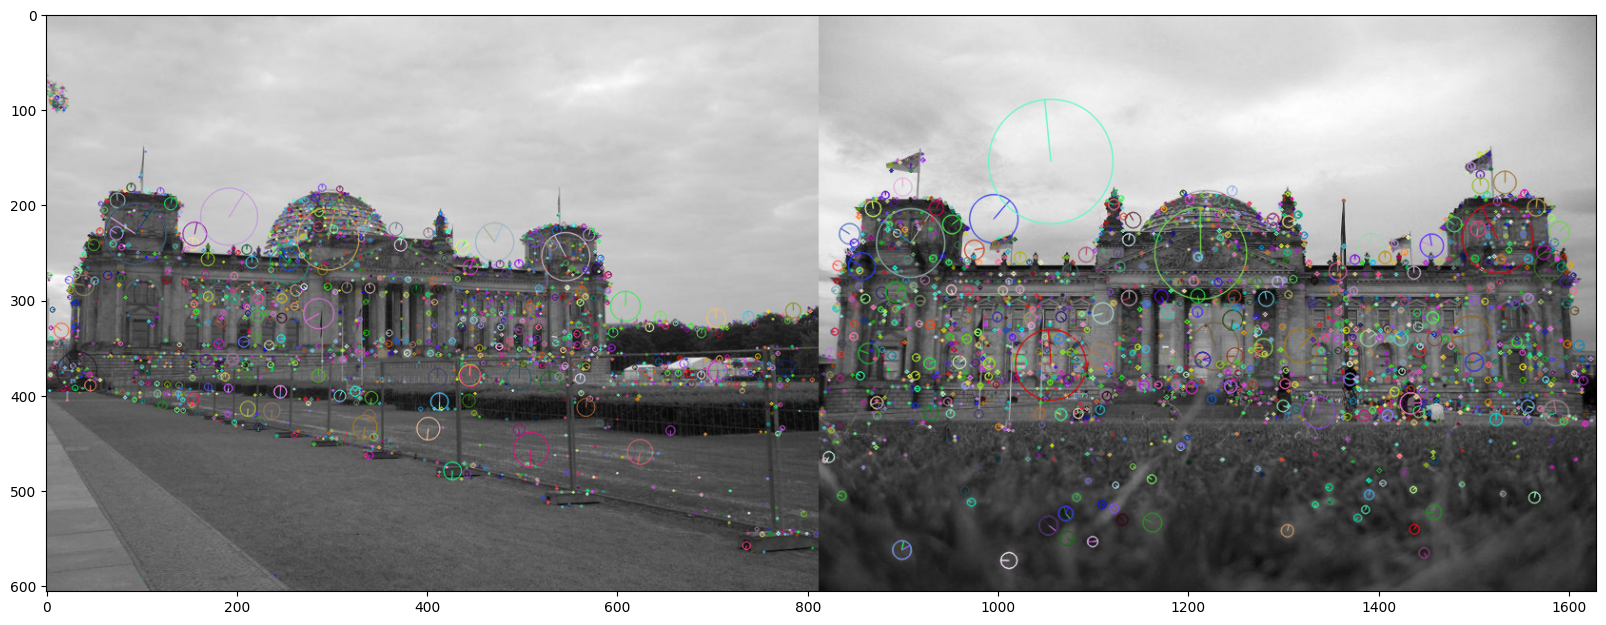

In [12]:
#This section creates a new window. For the code to progress, this window needs to be closed.

def read_img(filename):

    img = cv2.imread(filename)
    # Converting image to grayscale
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Applying SIFT detector
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img, None)

    # Marking the keypoint on the image using circles
    img=cv2.drawKeypoints(gray ,keypoints ,img ,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return keypoints, descriptors, img

def hconcat_resize_min(im_list, interpolation=cv2.INTER_CUBIC):
    h_min = min(im.shape[0] for im in im_list)
    im_list_resize = [cv2.resize(im, (int(im.shape[1] * h_min / im.shape[0]), h_min), interpolation=interpolation)
                      for im in im_list]
    return cv2.hconcat(im_list_resize)

kpa, desca, imga = read_img('a.jpg')
kpb, descb, imgb = read_img('b.jpg')

hstack = hconcat_resize_min([imga, imgb])

plt.rcParams['figure.figsize'] = (20,20)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(hstack)
plt.show() 


<span style="color:blue"> **(30 pt) (C)** </span> **Match the obtained descriptors in the two images and display the results that draw lines between the matched descriptors from the two images. You can use the built-in functions from $opencv$ to get and display the results for image matching.**

<hr>

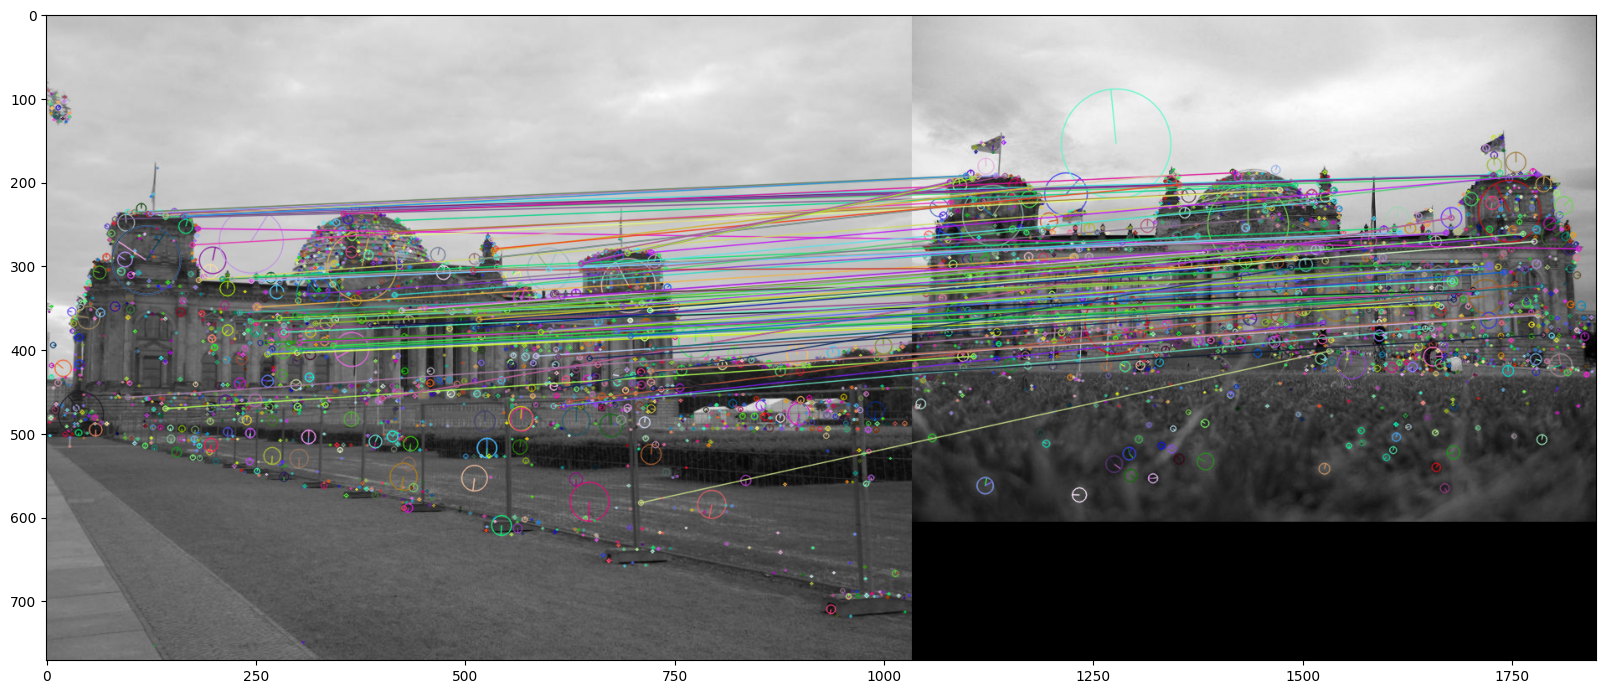

In [13]:
# create BFMatcher object
bf = cv2.BFMatcher()
# Match descriptors.
matches = bf.knnMatch(desca, descb,k=2)

good = []

for m,n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)

# Draw first 10 matches.
img3 = cv2.drawMatches(imga,kpa,imgb,kpb,good[:100],None,flags=2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(img3)
plt.show()



# <span style="color:blue">Contributions<a class="anchor" id="chapter3"></a></span>

On the basis of the exercises, we split the task.
Chris did exercise 2 and Herman did exercise 1. 
In addition, we supported one another when we were struggling with a part of the exercise.


